(1797, 64)


<Figure size 432x288 with 0 Axes>

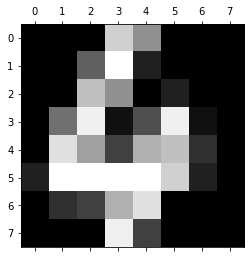

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[800])

plt.show()

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# PCA (preprocessing and visualization)

In [3]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
Y = digits.target

In [8]:
X.shape

(1797, 64)

In [24]:
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
print(x_pca.shape)

(1797, 2)


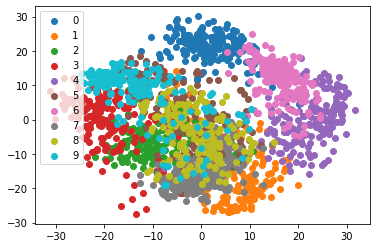

In [16]:
import numpy as np
n_unique = np.unique(Y)

for unique_class in n_unique:
    mask = Y == unique_class
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], cmap="Set1", label=unique_class)
plt.legend()

In [23]:
pca = PCA(n_components=3)
pca.fit(X)
x_pca_3d = pca.transform(X)
print(x_pca_3d.shape)

(1797, 3)


C:\Users\Robotux\AppData\Local\Temp\ipykernel_7060\1134005094.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


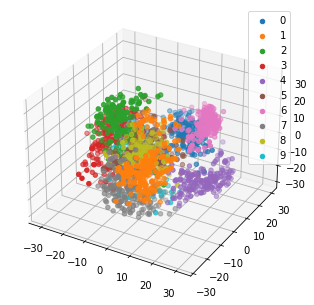

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
n_unique = np.unique(Y)
for unique_class in n_unique:
    mask = Y == unique_class
    ax.scatter(x_pca[mask, 0], x_pca[mask, 1], x_pca[mask, 2], cmap="Set1", label=unique_class)
ax.legend()

In [26]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)
print (knn.score(X, Y) )

knn.fit(x_pca, Y)
# knn.score(x_pca, Y)
print (knn.score(x_pca, Y) )

knn.fit(x_pca_3d, Y)
print ( knn.score(x_pca_3d, Y) )

0.9905397885364496
0.7301057317751809
0.8391764051196439


In [32]:
pca = PCA(n_components=0.9)
pca.fit(X)
x_pca_95p = pca.transform(X)
print (x_pca_95p.shape )
knn.fit(x_pca_95p, Y)
print ( knn.score(x_pca_95p, Y) )

(1797, 21)
0.9905397885364496


# TSNE (only for visualization)

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="pca")
x_tsne = tsne.fit_transform(X, Y)


C:\Users\Robotux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Robotux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


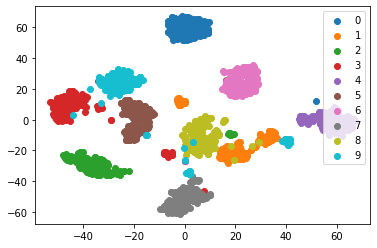

In [44]:
n_unique = np.unique(Y)

for unique_class in n_unique:
    mask = Y == unique_class
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], cmap="Set1", label=unique_class)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


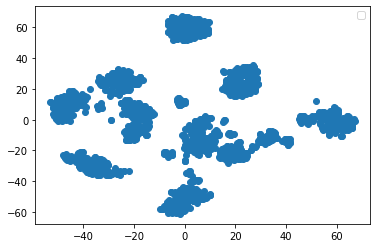

In [43]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], cmap="Set1")
plt.legend()